<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#折线图" data-toc-modified-id="折线图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>折线图</a></span></li><li><span><a href="#柱状图" data-toc-modified-id="柱状图-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>柱状图</a></span></li><li><span><a href="#直方图和密度图" data-toc-modified-id="直方图和密度图-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>直方图和密度图</a></span></li><li><span><a href="#散点图或点图" data-toc-modified-id="散点图或点图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>散点图或点图</a></span></li><li><span><a href="#分面网格和分类数据" data-toc-modified-id="分面网格和分类数据-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>分面网格和分类数据</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

# 折线图

In [3]:
s = Series(np.random.randn(10).cumsum(),
           index=np.arange(0, 100, 10))

In [4]:
s

0    -0.156513
10    0.915284
20    1.108715
30    2.271234
40    3.332454
50    2.260746
60    1.495033
70    2.563271
80    2.677674
90    2.057688
dtype: float64

<IPython.core.display.Javascript object>


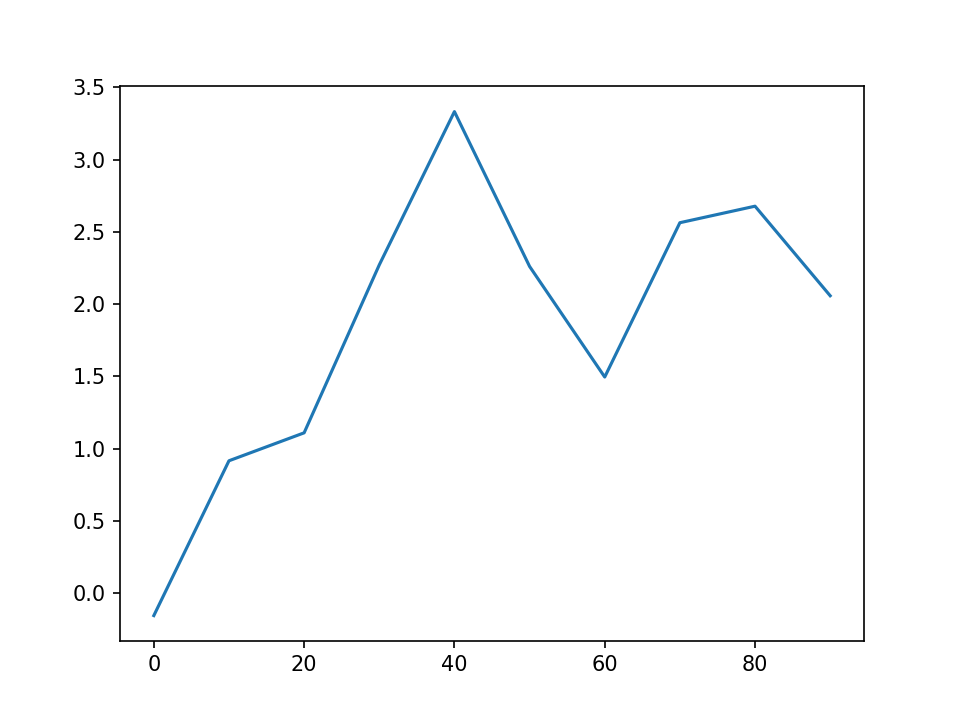

In [5]:
# Series对象的索引作为x轴
s.plot()

In [6]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))

In [7]:
df

,A,B,C,D
0,0.048950,0.855213,0.697912,-0.287284
10,1.213908,0.023356,2.648883,0.110897
20,0.918550,-0.947020,4.155140,1.932470
30,1.840961,-1.859361,3.527882,1.542140
40,1.538716,-2.052617,4.221190,2.090281
50,1.185067,-2.025948,4.120110,1.644947
60,0.808935,-2.603463,3.995162,1.581083
70,1.255008,-3.986830,4.107662,2.298088
80,2.997142,-4.016568,2.687801,2.097881
90,3.837104,-1.239366,4.619437,2.334815


<IPython.core.display.Javascript object>


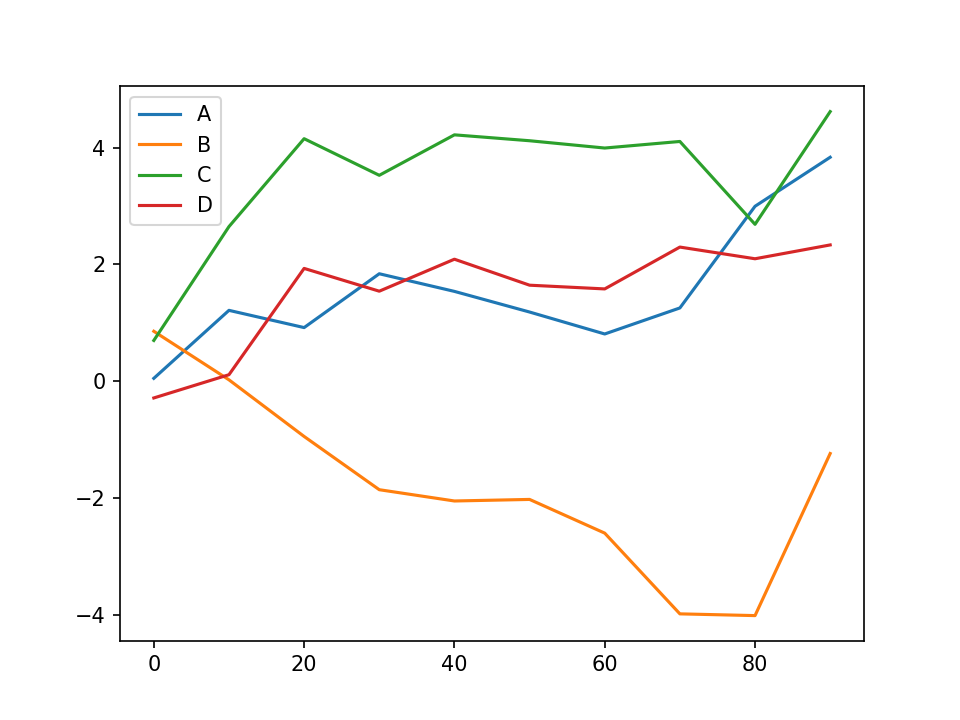

In [8]:
df.plot()

# 柱状图

<IPython.core.display.Javascript object>


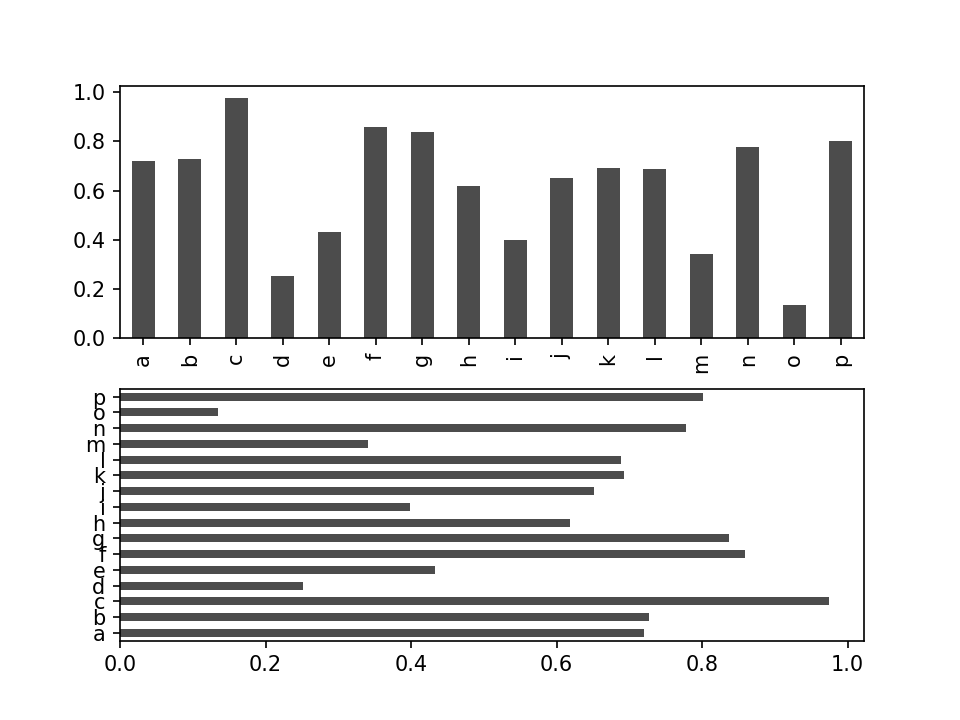

In [9]:
# 新建一个图片，并添加子图
fig, axes = plt.subplots(2, 1)

In [10]:
data = Series(np.random.rand(16),
              index=list('abcdefghijklmnop'))

In [11]:
data.plot.bar(ax=axes[0], # 第一个子图
              color='k', # 颜色为黑色
              alpha=0.7) # 透明度

In [12]:
# 水平柱状图
data.plot.barh(ax=axes[1], # 第二个子图
               color='k', # 颜色为黑色
               alpha=0.7) # 透明度

In [13]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [14]:
df

Genus,A,B,C,D
one,0.781488,0.531439,0.581754,0.066190
two,0.266461,0.728047,0.613727,0.891743
three,0.607032,0.945852,0.766386,0.972931
four,0.149388,0.817943,0.533948,0.635530
five,0.341915,0.795806,0.742196,0.601533
six,0.870506,0.996615,0.017659,0.655777


<IPython.core.display.Javascript object>


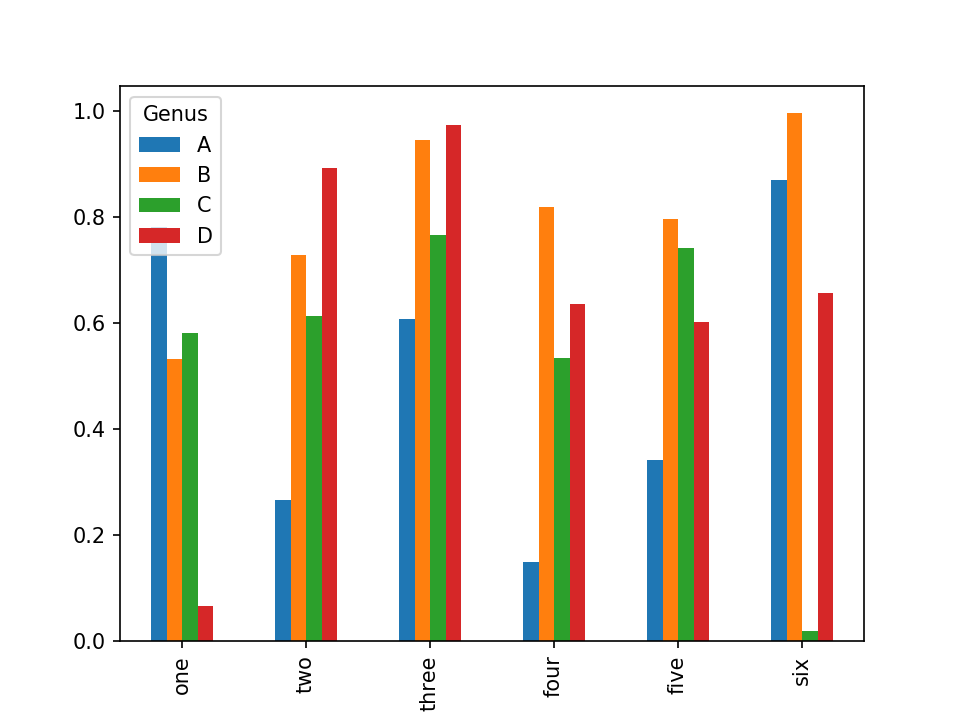

In [15]:
# DataFrame的列名称"Genus"被用作图例的标题
df.plot.bar()

<IPython.core.display.Javascript object>


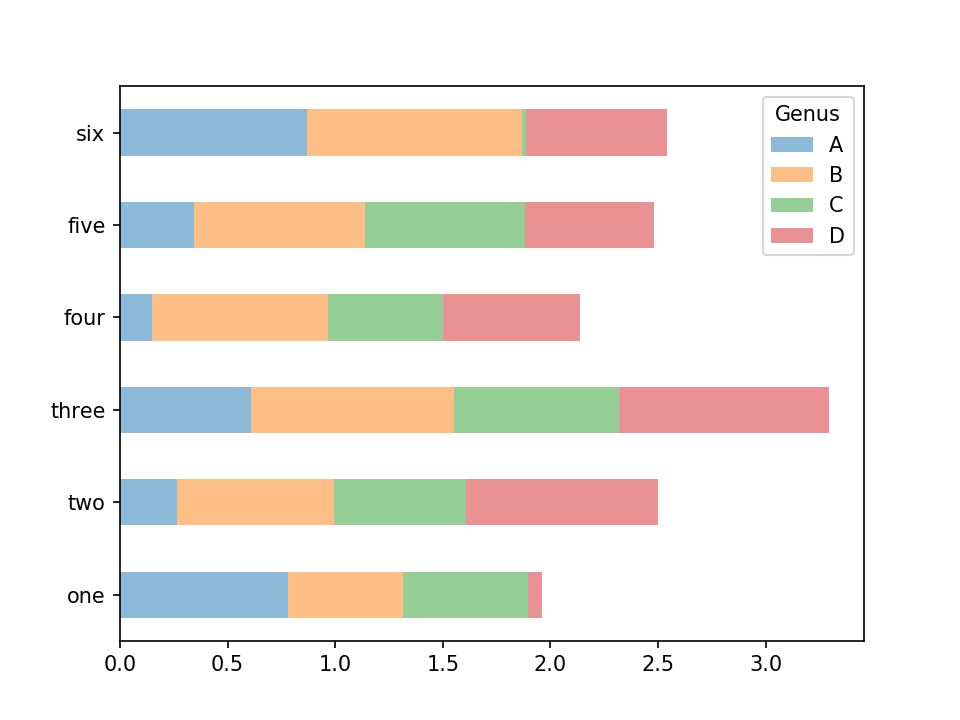

In [16]:
# 水平柱状图
df.plot.barh(stacked=True, # 堆积柱状图
             alpha=0.5) # 透明度

In [17]:
tips = pd.read_csv('C:/Users/z/python_for_data_analysis/pandas/examples/tips.csv')

In [18]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [19]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [20]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
# 由于1人和6人的排队人数较少，故不考虑
party_counts = party_counts.loc[:, 2:5]

In [22]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [23]:
# 标准化至和为1
party_pcts = party_counts.div(party_counts.sum(1), # 按行求和
                              axis=0) # 行

In [24]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


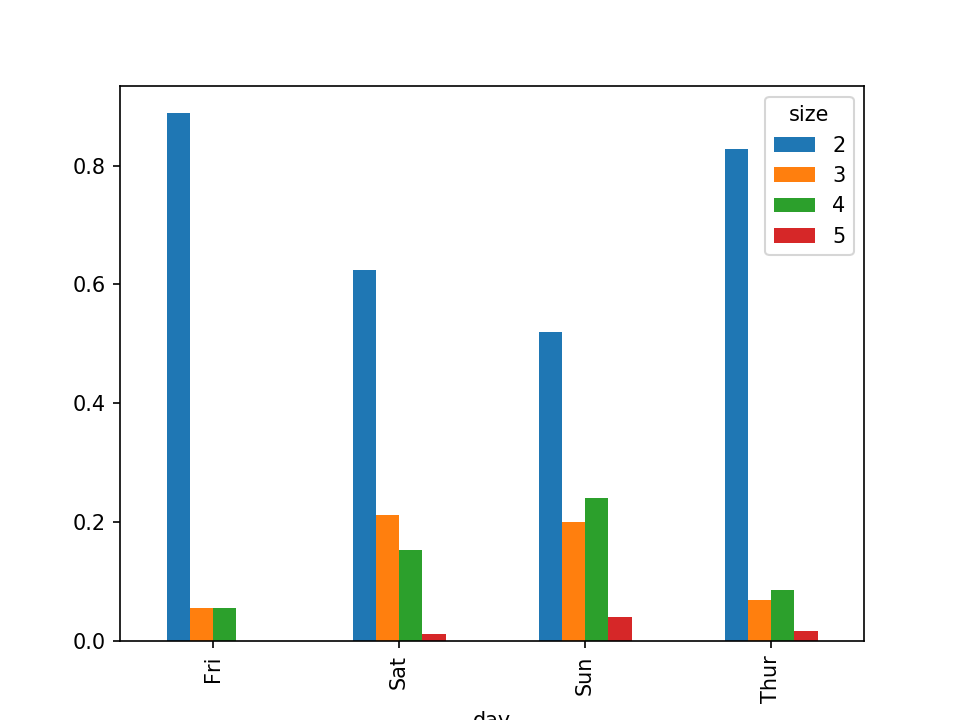

In [25]:
party_pcts.plot.bar()

In [26]:
import seaborn as sns

In [27]:
# 增加一列，用于表示小费的占比
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [28]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


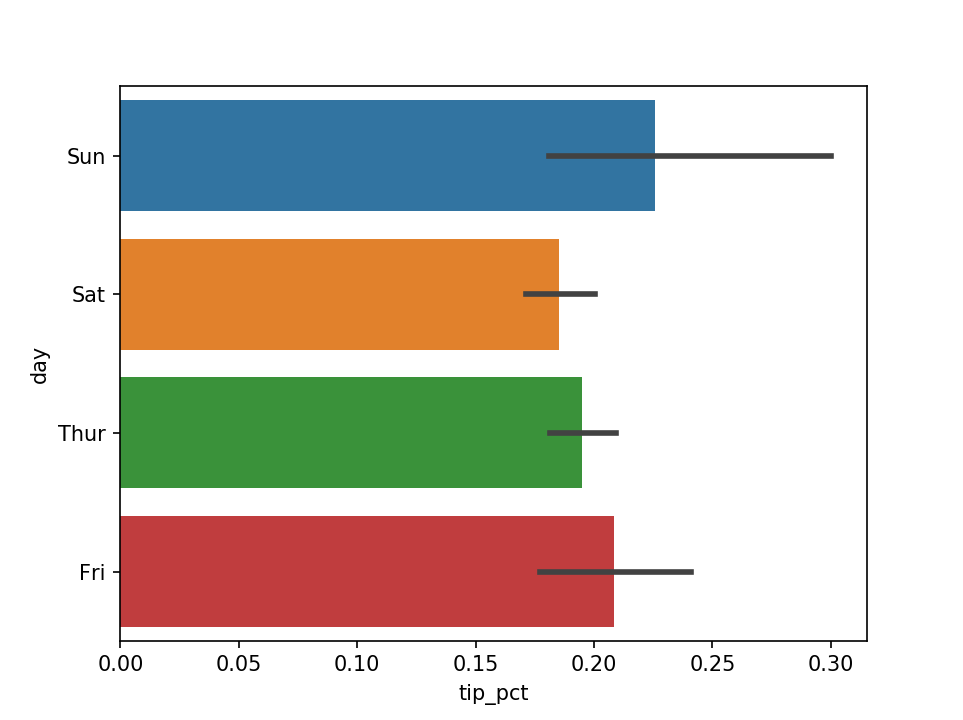

C:\Users\z\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [29]:
# 柱状图
fig = plt.figure()
sns.barplot(x='tip_pct', # x轴
            y='day', # y轴
            data=tips, # 数据来源
            orient='h') # 水平图

<IPython.core.display.Javascript object>


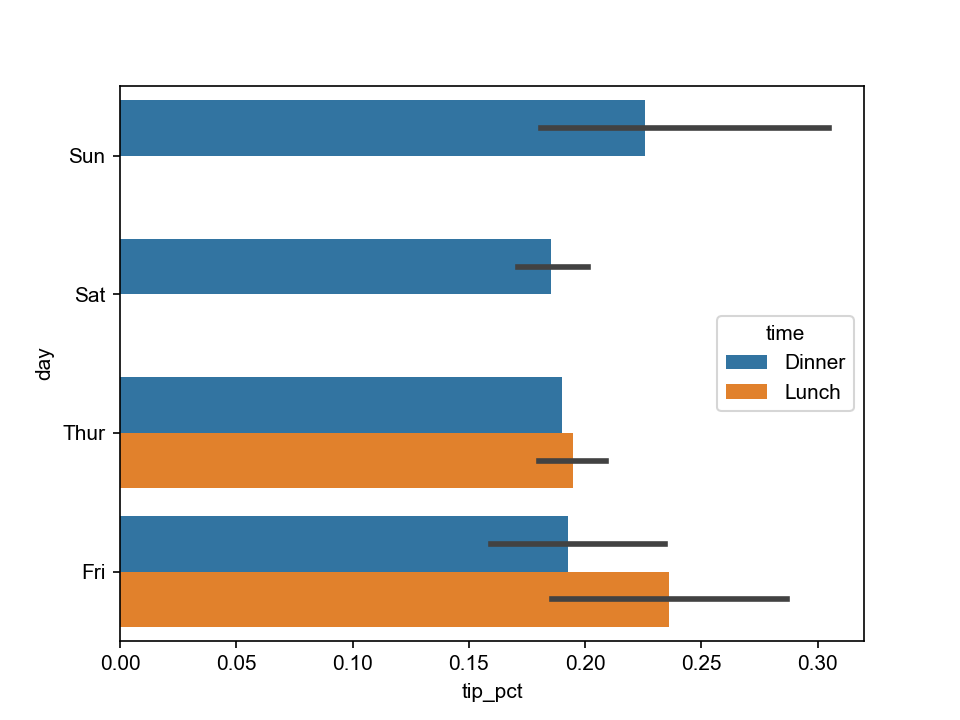

In [30]:
fig = plt.figure()
sns.barplot(x='tip_pct', # x轴
            y='day', # y轴
            hue='time',
            data=tips, # 数据来源
            orient='h') # 水平图

sns.set(style='whitegrid')

# 直方图和密度图

<IPython.core.display.Javascript object>


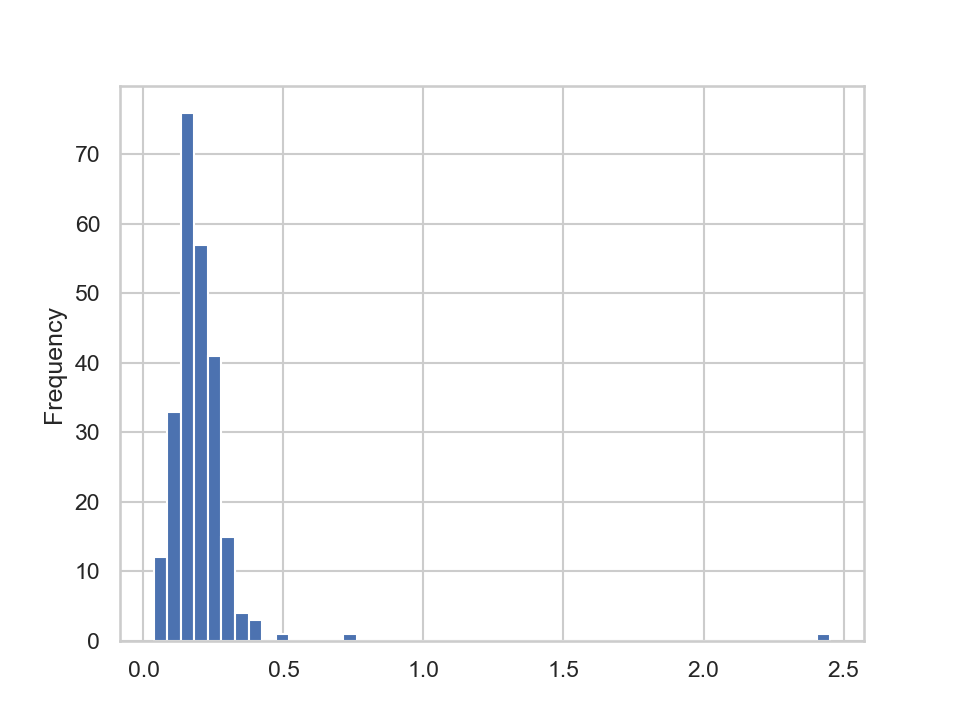

In [31]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


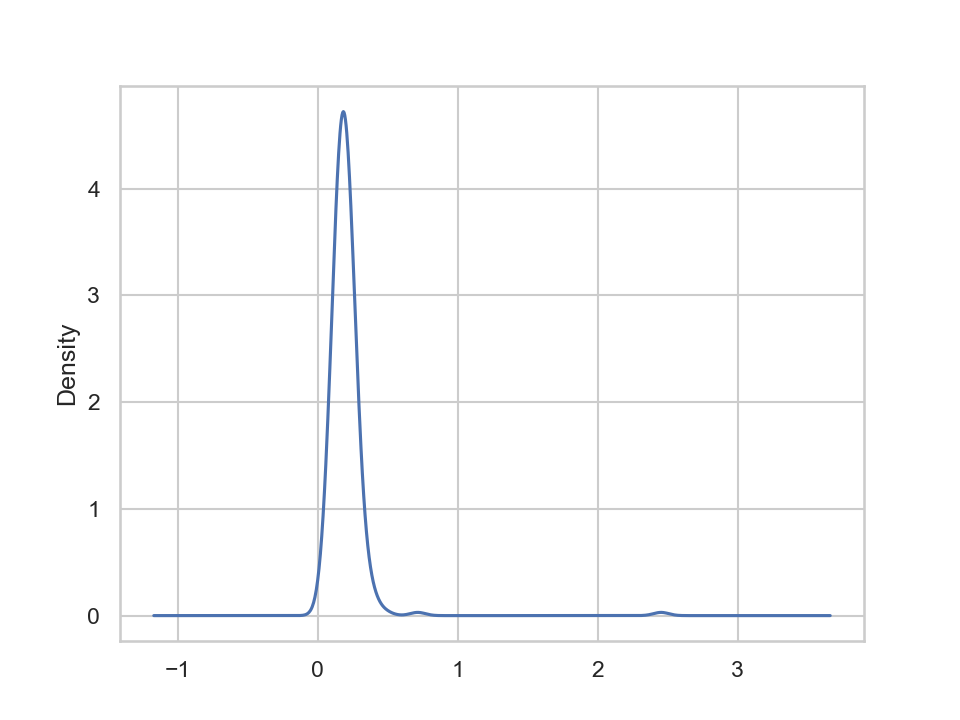

In [32]:
fig = plt.figure()
tips['tip_pct'].plot.density()

In [33]:
comp1 = np.random.normal(0, 1, size=200)

In [34]:
comp2 = np.random.normal(10, 2, size=200)

In [35]:
# np.concatenate() 拼接，默认按行
values = Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


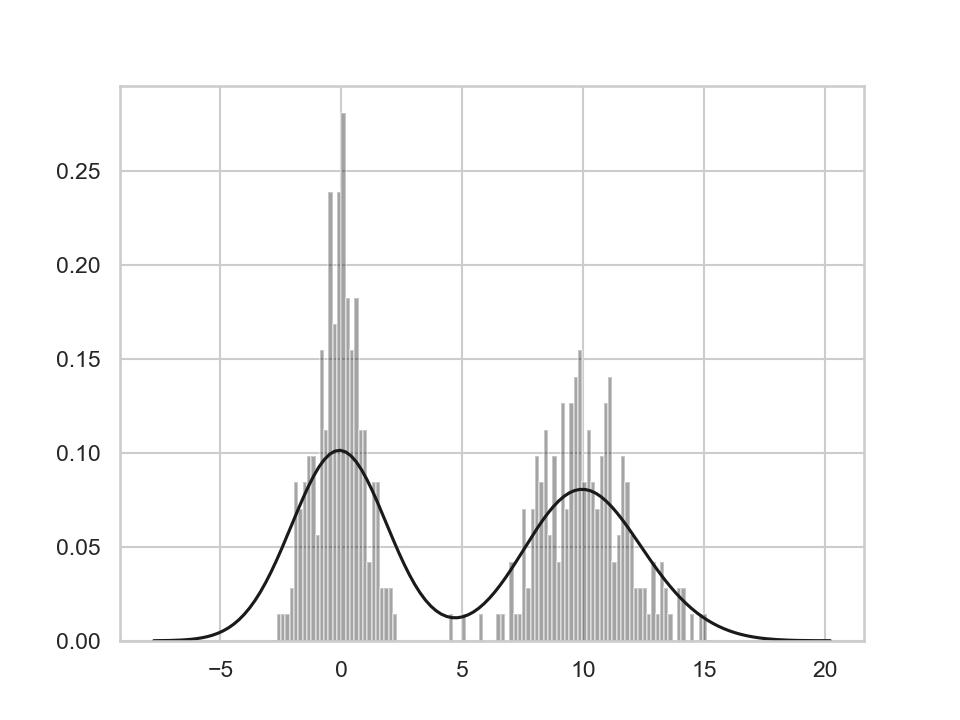

C:\Users\z\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [36]:
fig = plt.figure()
sns.distplot(values, bins=100, color='k')

# 散点图或点图

In [37]:
macro = pd.read_csv('C:/Users/z/python_for_data_analysis/pandas/examples/macrodata.csv')

In [38]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [39]:
# 只考虑这几列特征
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [40]:
trans_data = np.log(data).diff().dropna() # diff() 后一个数减去前一个数

In [41]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


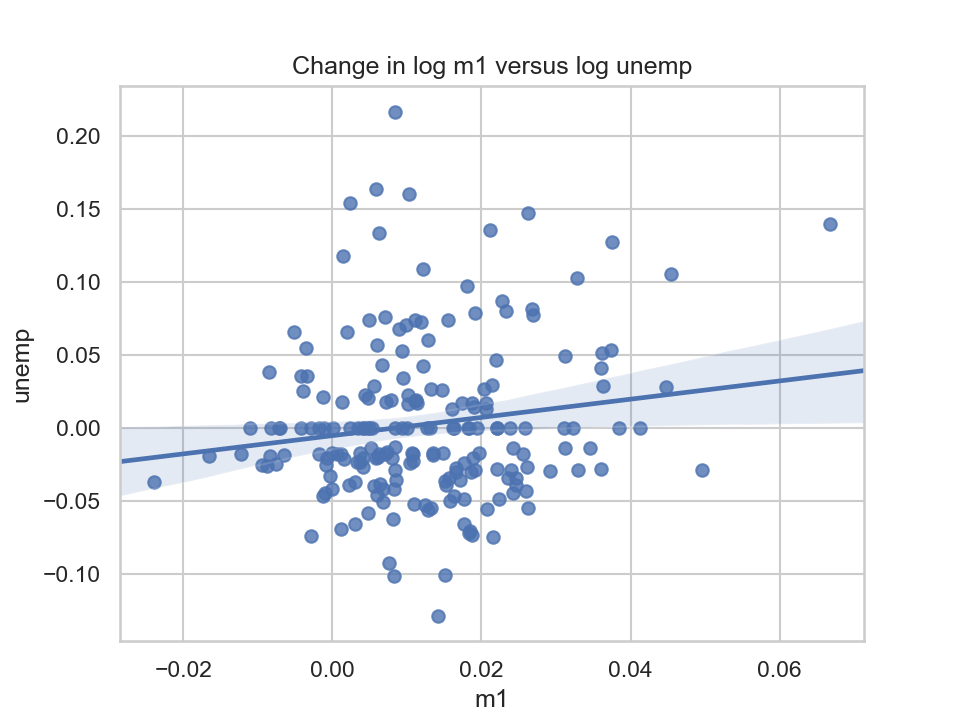

In [42]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)

In [43]:
plt.title('Change in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Change in log m1 versus log unemp')

<IPython.core.display.Javascript object>


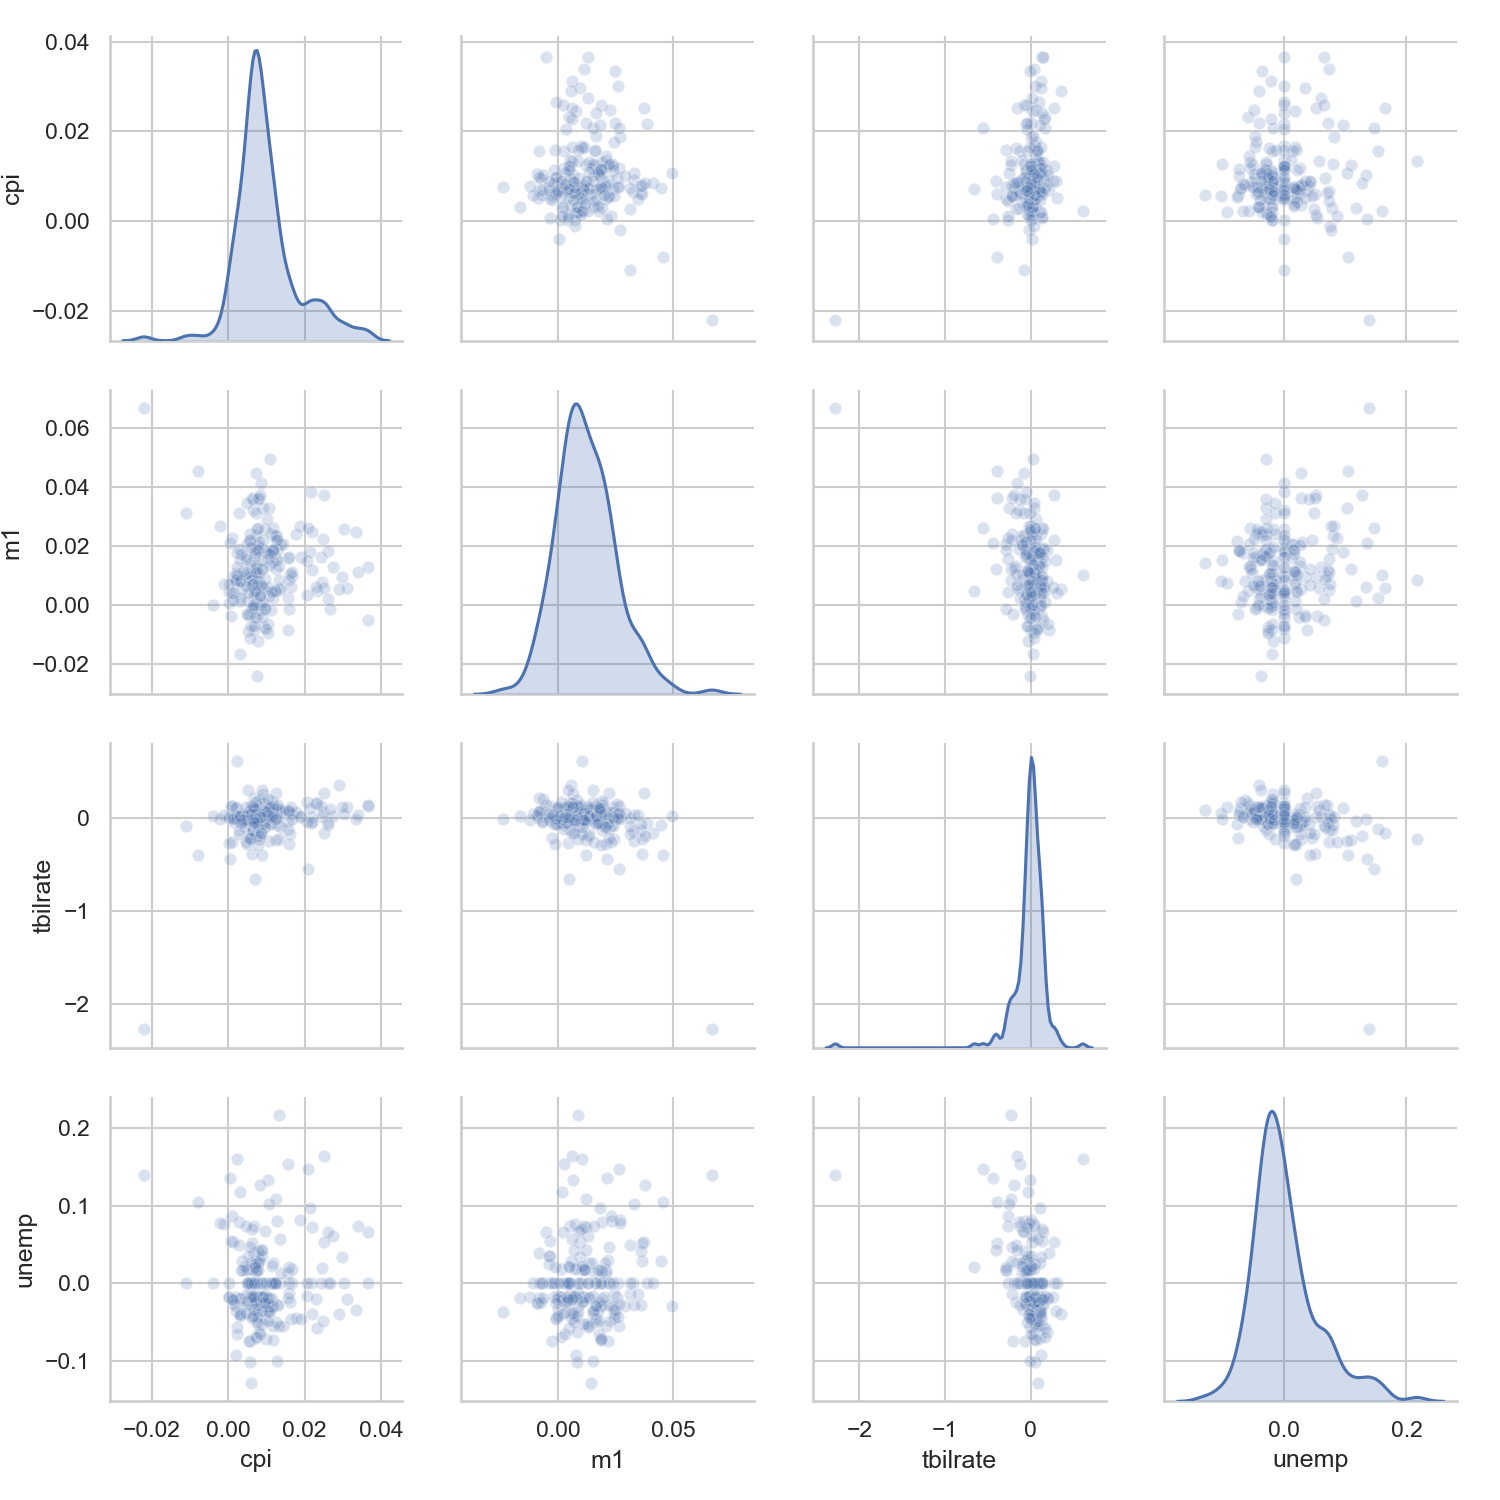

C:\Users\z\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [44]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

# 分面网格和分类数据

C:\Users\z\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


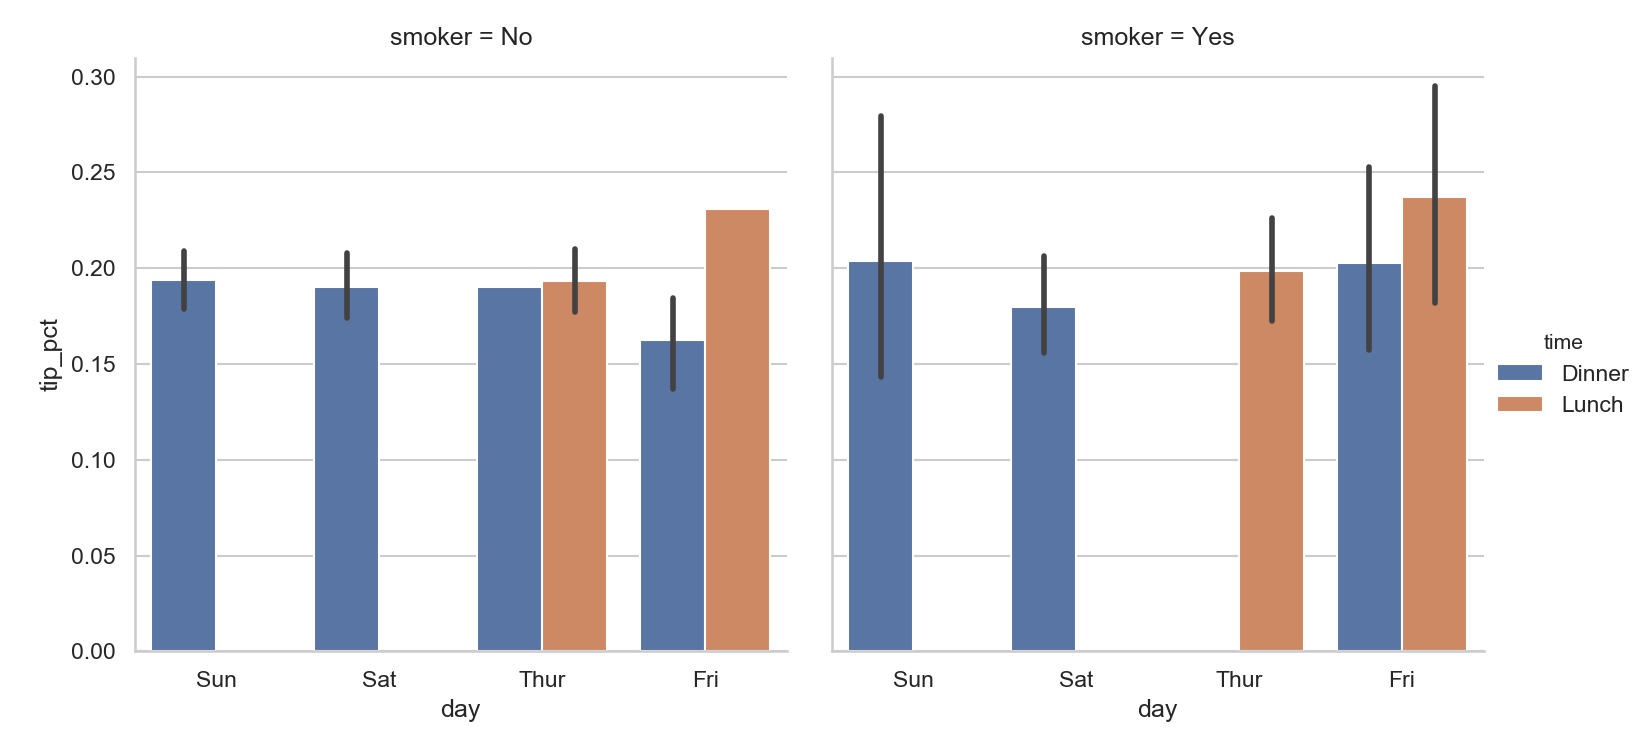

In [45]:
sns.factorplot(x='day',
               y='tip_pct',
               hue='time',
               col='smoker',
               kind='bar',
               data=tips[tips.tip_pct < 1])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


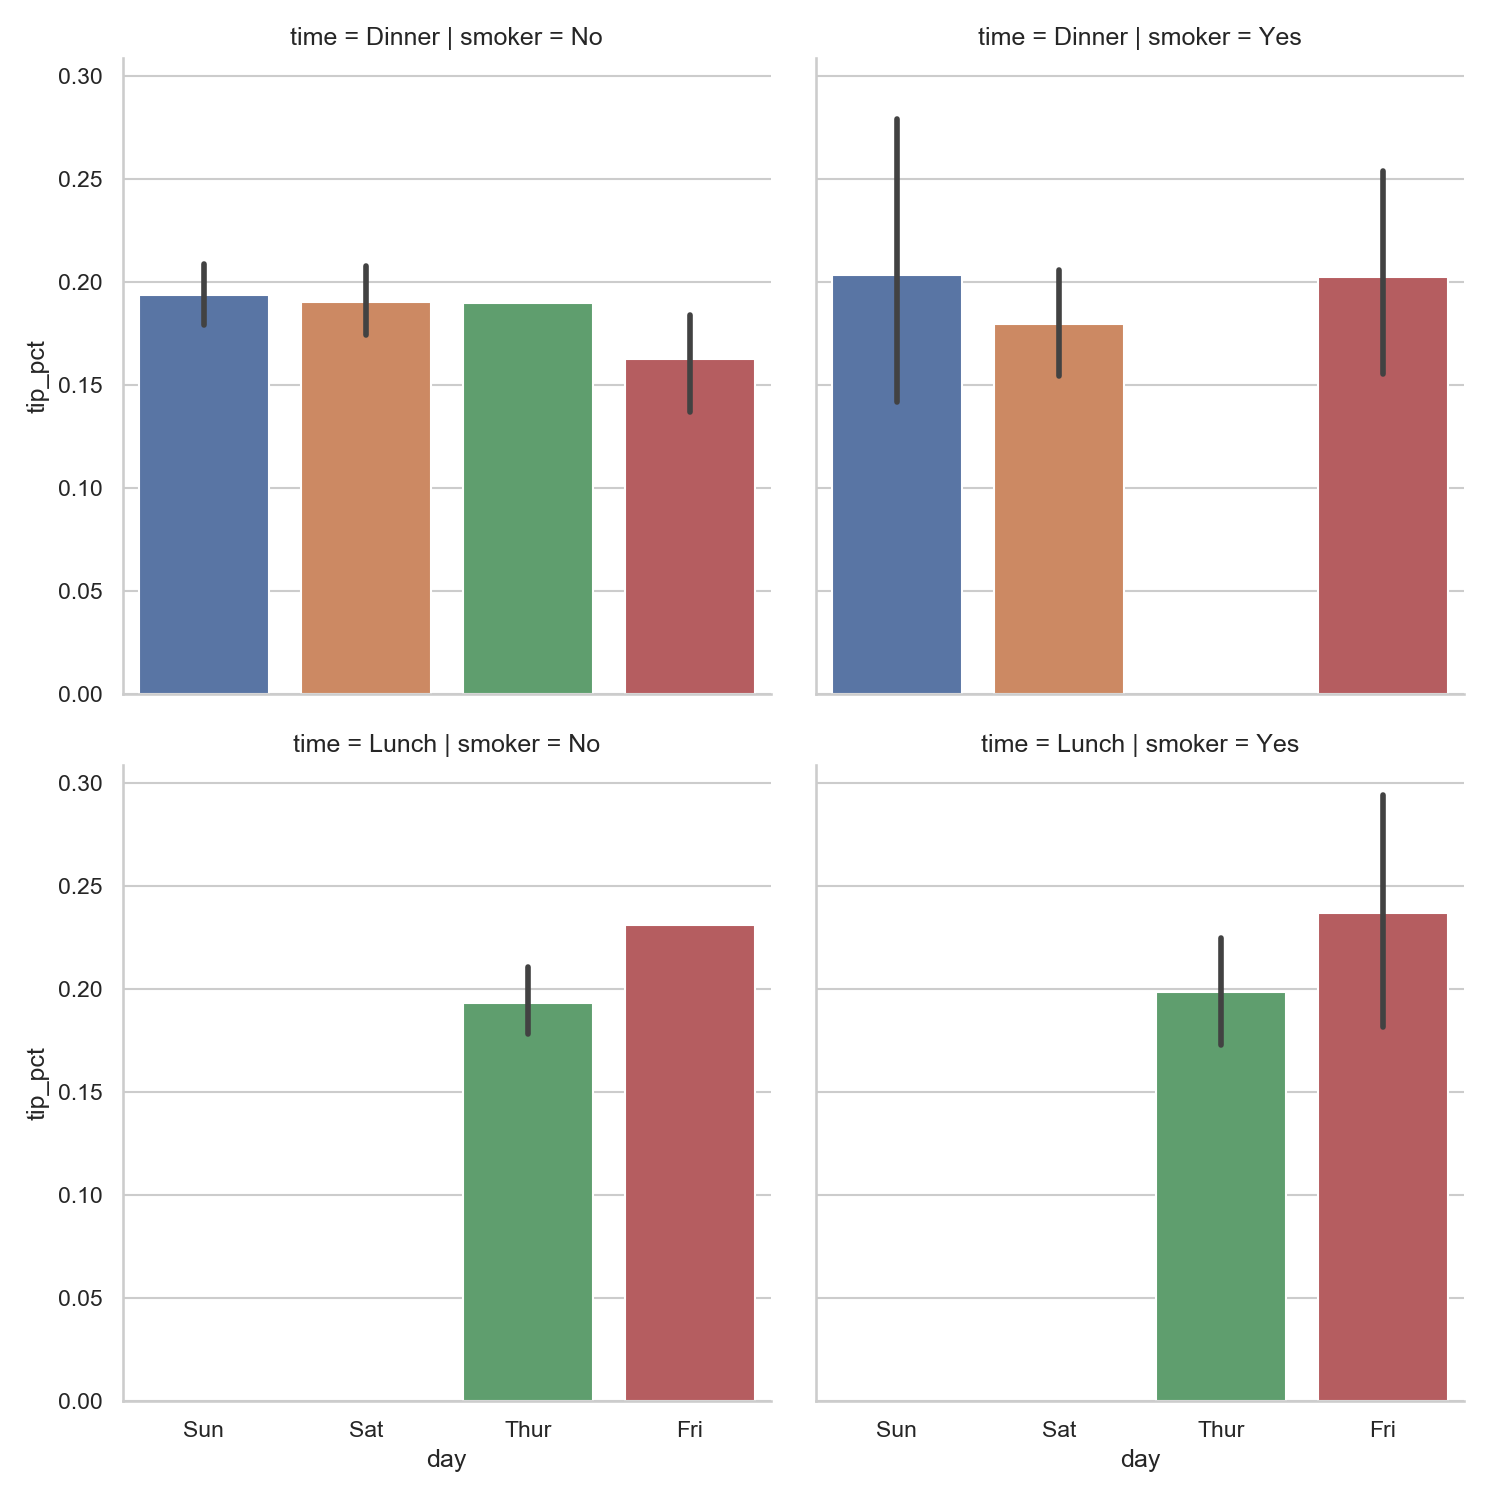

In [46]:
sns.factorplot(x='day',
               y='tip_pct',
               row='time',
               col='smoker',
               kind='bar',
               data=tips[tips.tip_pct < 1])

C:\Users\z\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


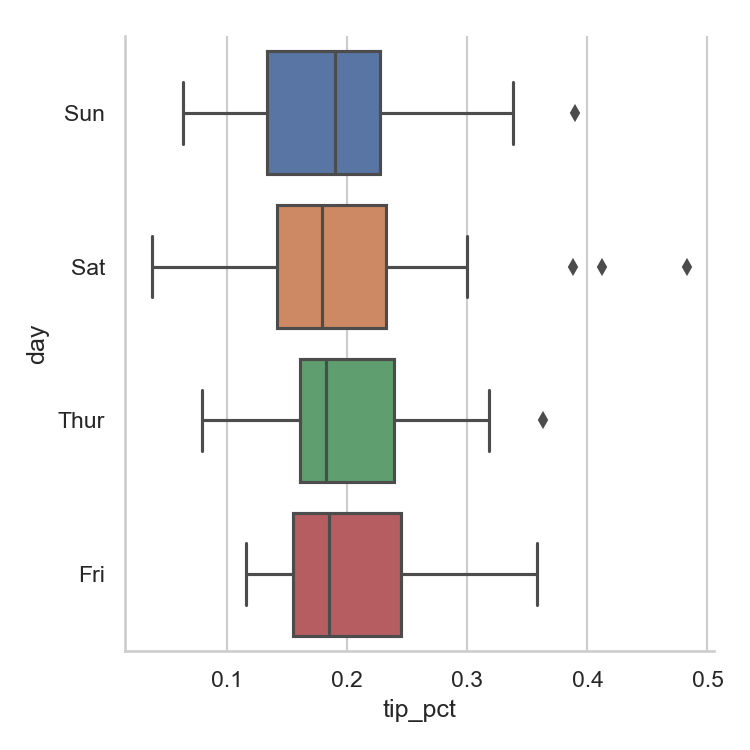

In [47]:
sns.factorplot(x='tip_pct',
               y='day',
               kind='box',
               data=tips[tips.tip_pct < 0.5])